In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170450944/170498071 [============================>.] - ETA: 0s   

In [5]:
from keras.utils import np_utils

X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0
y_train_one_hot = np_utils.to_categorical(y_train)
y_test_one_hot = np_utils.to_categorical(y_test)

In [6]:
"""
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)
"""
print(X_train_normalized.shape)
print(X_test_normalized.shape)
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
train_history = model.fit(x=X_train_normalized, y=y_train_one_hot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
123s - loss: 1.7417 - acc: 0.3688 - val_loss: 1.6439 - val_acc: 0.5264
Epoch 2/10
118s - loss: 1.2993 - acc: 0.5328 - val_loss: 1.4851 - val_acc: 0.5586
Epoch 3/10
119s - loss: 1.1580 - acc: 0.5895 - val_loss: 1.3658 - val_acc: 0.6207
Epoch 4/10
119s - loss: 1.0583 - acc: 0.6246 - val_loss: 1.2650 - val_acc: 0.6534
Epoch 5/10
120s - loss: 0.9837 - acc: 0.6500 - val_loss: 1.2254 - val_acc: 0.6674
Epoch 6/10
120s - loss: 0.9292 - acc: 0.6736 - val_loss: 1.1504 - val_acc: 0.6862
Epoch 7/10
122s - loss: 0.8680 - acc: 0.6924 - val_loss: 1.1175 - val_acc: 0.6696
Epoch 8/10
122s - loss: 0.8161 - acc: 0.7124 - val_loss: 1.0769 - val_acc: 0.6762
Epoch 9/10
122s - loss: 0.7676 - acc: 0.7278 - val_loss: 1.0276 - val_acc: 0.6939
Epoch 10/10
123s - loss: 0.7208 - acc: 0.7447 - val_loss: 0.9669 - val_acc: 0.7113


In [24]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

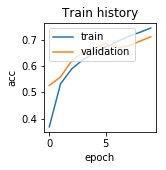

In [25]:
show_train_history(train_history, 'acc', 'val_acc')

In [26]:
model.save_weights("cifarCnnModel.h5")

In [27]:
predicted_probability = model.predict(X_test_normalized)

In [28]:
for i in range(10):
    print(predicted_probability[0][i])

0.0663614
0.00920479
0.0590635
0.489407
0.0625825
0.158885
0.0608196
0.0175802
0.0549904
0.0211048


In [29]:
label_dict = {0:'Airplane', 1:'Automobile', 2:'Bird', 3:"Cat", 4:"Deer", 5:'Dog', 6:'Frog', 7:'Horse', 8:'Ship', 9:'truck'}

In [106]:
import numpy as np
# y_head[i] == The label of testing data in index i, 10 dimensions, one-hot encoding
# y_head[i][j] == 0 or 1
def show_predicted_probability(y_head, y, x, predicted_prob, i):
    print('label   : ', label_dict[y_head[i][0]])
    print('predict : ', label_dict[y[i]])
    plt.figure(figsize=(2, 2))
    plt.imshow(np.reshape(x[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print("{0:<10} Probability: {1:.3f}".format(label_dict[j], predicted_prob[i][j]))
#         print('%<10s Probability: %f' %(label_dict[j], predicted_prob[i][j]))

In [107]:
prediction = model.predict_classes(X_test_normalized)

 9952/10000 [============================>.] - ETA: 0s 

label   :  Horse
predict :  Dog


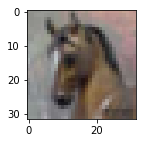

Airplane   Probability: 0.009
Automobile Probability: 0.000
Bird       Probability: 0.122
Cat        Probability: 0.246
Deer       Probability: 0.078
Dog        Probability: 0.289
Frog       Probability: 0.207
Horse      Probability: 0.045
Ship       Probability: 0.001
truck      Probability: 0.002


In [108]:
show_predicted_probability(y_test, prediction, X_test_normalized, predicted_probability, 210)

In [110]:
scores = model.evaluate(X_test_normalized, y_test_one_hot, verbose=2)

In [113]:
print(scores[1])

0.7159


In [114]:
%save cnn_cifar10.py 1-2 5-10 24-29 106-108 110 113

The following commands were written to file `cnn_cifar10.py`:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
from keras.utils import np_utils

X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0
y_train_one_hot = np_utils.to_categorical(y_train)
y_test_one_hot = np_utils.to_categorical(y_test)
print(X_train_normalized.shape)
print(X_test_normalized.shape)
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_siz